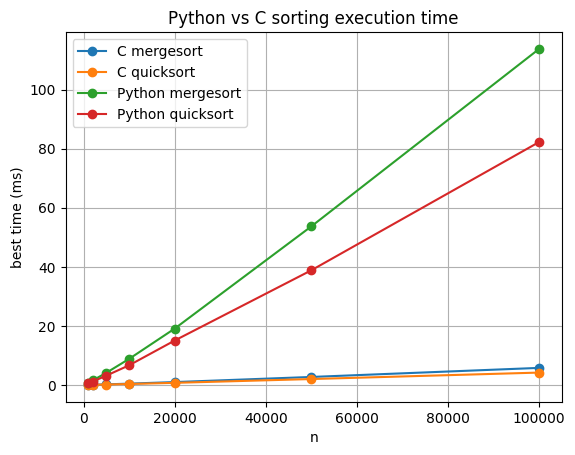

In [3]:
import csv
import matplotlib.pyplot as plt

def read_csv(path):
    rows = []
    with open(path, newline="") as f:
        for r in csv.DictReader(f):
            r["n"] = int(r["n"])
            r["best_ms"] = float(r["best_ms"])
            rows.append(r)
    return rows

rows = read_csv("c_times.csv") + read_csv("py_times.csv")

# group: (language, algorithm) -> list of (n, ms)
groups = {}
for r in rows:
    key = (r["language"], r["algorithm"])
    groups.setdefault(key, []).append((r["n"], r["best_ms"]))

for key, pts in groups.items():
    pts.sort()
    xs = [p[0] for p in pts]
    ys = [p[1] for p in pts]
    plt.plot(xs, ys, marker="o", label=f"{key[0]} {key[1]}")

plt.xlabel("n")
plt.ylabel("best time (ms)")
plt.title("Python vs C sorting execution time")
plt.grid(True)
plt.legend()
plt.savefig('image_2.png')
plt.show()